# Example: Looking closer how distributions work #2

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from pysatl_core.distributions import (
    AnalyticalComputation,
    StandaloneEuclideanUnivariateDistribution,
    distribution_type_register,
)
from pysatl_core.distributions.registry import _reset_distribution_type_register_for_tests
from pysatl_core.types import Kind, UnivariateContinuous

_reset_distribution_type_register_for_tests()


def plot_function(func, x_min=-0.5, x_max=1.5, num=1000, title=None, xlabel="x", ylabel="y"):
    x = np.linspace(x_min, x_max, num)
    try:
        y = func(x)
    except Exception:
        y = np.vectorize(func, otypes=[float])(x)
    plt.figure()
    plt.plot(x, y)
    if title:
        plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


def plot_histogram(sample, x_min=None, x_max=None, bins=30, density=True, title=None, xlabel="x"):
    plt.figure()
    hist_kwargs = {"bins": bins, "density": density}
    if x_min is not None and x_max is not None:
        hist_kwargs["range"] = (x_min, x_max)
    counts, bin_edges, _ = plt.hist(sample, **hist_kwargs)
    if x_min is not None and x_max is not None:
        plt.xlim(x_min, x_max)
    if title:
        plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("density" if density else "count")
    plt.grid(True)
    plt.show()

In [3]:
reg = distribution_type_register()
reg_uc = reg.get(UnivariateContinuous)

PDF = "pdf"
CDF = "cdf"
PPF = "ppf"

We've just registered UnivariateContinious distribution type. Now we can work with it. Also, we've just created characteristics, you can always check it with your register, using all_nodes() method

In [4]:
reg_uc.all_characteristics()
reg_uc.definitive_characteristics()

frozenset({'cdf', 'pdf', 'ppf'})

Now we're ensured that every one of these characteristics are can be used by any of Univariate Continuous distribution if we provided just one of `reg_uc.definitive_nodes()`. Let's do it!
> **_NOTE:_** In current example `reg_uc.definitive_nodes()` and `reg_uc.all_nodes()` are the same

## Let's make uniform distribution

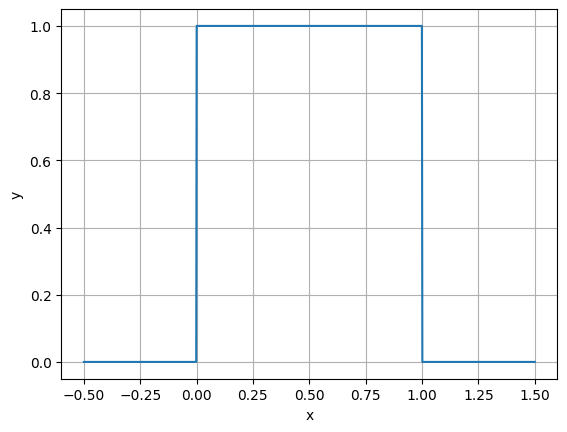

In [5]:
uniform_distribution = StandaloneEuclideanUnivariateDistribution(
    kind=Kind.CONTINUOUS,
    analytical_computations=[
        AnalyticalComputation[float, float](
            target=PDF, func=lambda x: 1.0 if (0.0 <= x <= 1.0) else 0.0
        ),
    ],
)

pdf_uni = uniform_distribution.query_method(PDF)

plot_function(pdf_uni)

Okay, now we've just calculated pdf with pdf that we have provided. Let's try other characteristics

In [6]:
cdf_uni = uniform_distribution.query_method(CDF)

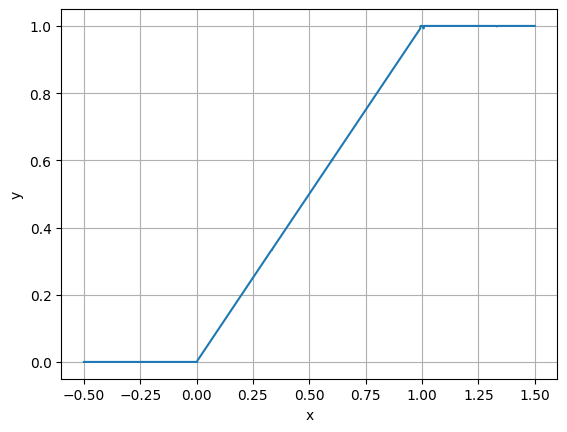

In [7]:
plot_function(cdf_uni)

In [8]:
ppf_uni = uniform_distribution.query_method(PPF)

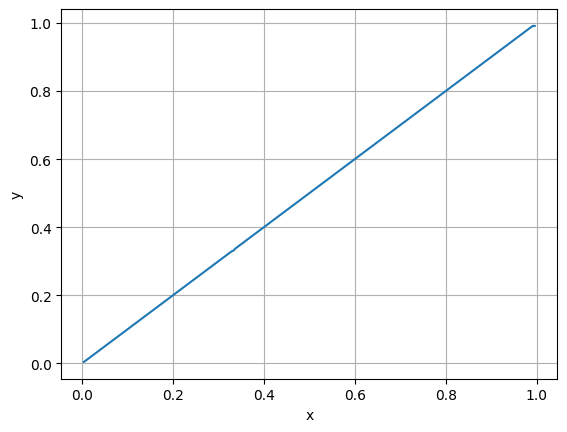

In [9]:
# Very slow, everything is lazy, got to do smth with
plot_function(ppf_uni, x_min=0, x_max=1, num=250)

## Sampling

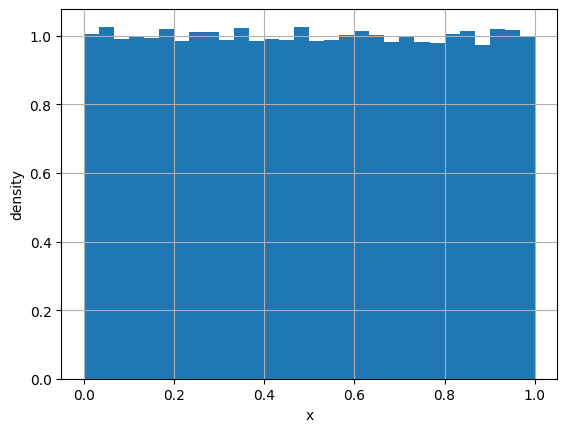

In [10]:
# We're gonna set ppf analytically not to wait too long
uniform_distribution = StandaloneEuclideanUnivariateDistribution(
    kind=Kind.CONTINUOUS,
    analytical_computations=[
        AnalyticalComputation[float, float](
            target=PDF, func=lambda x: 1.0 if (0.0 <= x <= 1.0) else 0.0
        ),
        AnalyticalComputation[float, float](
            target=PPF, func=lambda p: p if (0.0 <= p <= 1.0) else float("nan")
        ),
    ],
)

sample = uniform_distribution.sample(100_000)

plot_histogram(sample.array[:, 0])

Now let's calculate log_likelihood

In [11]:
uniform_distribution.log_likelihood(sample)

0.0